# Hackathon Challenge - Innomatics Research Labs(Hyderabad)

## PUBG (EDA)Exploratory Data Analysis Task

#### STEP-1

#### Data Description: 
In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.

You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 players per group.

##### In our dataset the columns represent the following:

* DBNOs - Number of enemy players knocked.
* assists - Number of enemy players this player damaged that were killed by teammates.
* boosts - Number of boost items used.
* damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
* headshotKills - Number of enemy players killed with headshots.
* heals - Number of healing items used.
* Id - Player’s Id
* killPlace - Ranking in match of number of enemy players killed.
* killPoints - Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is    a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
* killStreaks - Max number of enemy players killed in a short amount of time.
* kills - Number of enemy players killed.
* longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player    and driving away may lead to a large longestKill stat.
* matchDuration - Duration of match in seconds.
* matchId - ID to identify matches. There are no matches that are in both the training and testing set.
* matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-   fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
* rankPoints - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so    use with caution. Value of -1 takes the place of “None”.
* revives - Number of times this player revived teammates.
* rideDistance - Total distance traveled in vehicles measured in meters.
* roadKills - Number of kills while in a vehicle.
* swimDistance - Total distance traveled by swimming measured in meters.
* teamKills - Number of times this player killed a teammate.
* vehicleDestroys - Number of vehicles destroyed.
* walkDistance - Total distance traveled on foot measured in meters.
* weaponsAcquired - Number of weapons picked up.
* winPoints - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is    a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
* groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a      different  groupId each time.
* numGroups - Number of groups we have data for in the match.
* maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over    placements.
* winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0   
  corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing     chunks in a match.



##### STEP-2

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


## Step-3 Data Description

In [4]:
data.shape

(1111742, 30)

* IN our DataSet there are 1111742 rows and 30 columns in data.

In [5]:
data.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

* we have only one miising value in winPlacePerc Column

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [7]:
data.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


 * we are dividing into categorical features and numerical features from the data

In [8]:
#categorical features
categorical = data.select_dtypes(include = [np.object])
print("Categorical Features in DataSet:",categorical.shape[1])

#numerical features
numerical= data.select_dtypes(include = [np.float64,np.int64])
print("Numerical Features in DataSet:",numerical.shape[1])

Categorical Features in DataSet: 4
Numerical Features in DataSet: 26


In [9]:
data["winPlacePerc"] = data["winPlacePerc"].fillna(np.mean(data["winPlacePerc"]))
data[data["winPlacePerc"].isnull()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [10]:
data['matchType'].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133854
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

In [11]:
print('Id count', data['Id'].nunique())
print('groupId count', data['groupId'].nunique())
print('matchId count', data['matchId'].nunique())

Id count 1111742
groupId count 870622
matchId count 47951


###  Exploratory Data Analysis

In [12]:
data.skew()

Unnamed: 0          0.000003
assists             3.608622
boosts              1.953292
damageDealt         3.014093
DBNOs               3.185760
headshotKills       6.048764
heals               3.476639
killPlace           0.027635
killPoints          0.520990
kills               3.452266
killStreaks         1.286748
longestKill         3.999413
matchDuration       0.274046
maxPlace            1.354716
numGroups           1.361751
rankPoints         -0.367622
revives             4.018129
rideDistance        3.335737
roadKills          35.613026
swimDistance       13.988223
teamKills           8.174814
vehicleDestroys    12.744544
walkDistance        1.091027
weaponsAcquired     2.609852
winPoints           0.407401
winPlacePerc        0.098283
dtype: float64

In [13]:
data.kurtosis()

Unnamed: 0           -1.201103
assists              21.796652
boosts                4.315384
damageDealt          21.441811
DBNOs                21.499852
headshotKills       195.621011
heals                19.498255
killPlace            -1.184863
killPoints           -1.559758
kills                30.707200
killStreaks           2.788812
longestKill          25.412510
matchDuration        -1.255459
maxPlace              0.488157
numGroups             0.537757
rankPoints           -1.800895
revives              36.461919
rideDistance         14.295050
roadKills          2628.263567
swimDistance        346.205853
teamKills            89.672993
vehicleDestroys     190.139282
walkDistance          0.942376
weaponsAcquired      55.587503
winPoints            -1.823766
winPlacePerc         -1.245227
dtype: float64

#### the data is skew ,we can say that roadKills has more skew value and rankPoints  has most negitive skew value

In [18]:
data.corr()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Unnamed: 0,1.000000,0.001488,0.000571,-0.000012,-0.000261,0.001353,-0.000650,0.000104,0.000051,0.000249,...,-0.000484,0.000627,0.000200,0.000795,0.000071,-0.000483,-0.000273,-0.000137,0.000043,-0.000144
assists,0.001488,1.000000,0.306582,0.409369,0.302200,0.199487,0.228456,-0.289984,0.038331,0.322068,...,0.197938,0.110496,0.012366,0.022871,0.007775,0.058241,0.288579,0.244595,0.023341,0.297738
boosts,0.000571,0.306582,1.000000,0.519600,0.357903,0.331536,0.535388,-0.554046,0.008992,0.499478,...,0.254125,0.329281,0.033775,0.107880,0.014645,0.085997,0.639361,0.405301,-0.006973,0.633482
damageDealt,-0.000012,0.409369,0.519600,1.000000,0.735084,0.613306,0.341620,-0.676134,0.050217,0.889038,...,0.256318,0.139840,0.050660,0.037509,0.016209,0.079901,0.396621,0.354515,0.017990,0.438973
DBNOs,-0.000261,0.302200,0.357903,0.735084,1.000000,0.467393,0.265348,-0.554858,0.042139,0.706211,...,0.301098,0.101882,0.035705,0.018726,0.071295,0.059857,0.284051,0.217667,0.010483,0.279322
headshotKills,0.001353,0.199487,0.331536,0.613306,0.467393,1.000000,0.197936,-0.468079,0.024203,0.673739,...,0.149131,0.076275,0.011974,0.029988,0.009198,0.039857,0.249591,0.215613,0.005029,0.276170
heals,-0.000650,0.228456,0.535388,0.341620,0.265348,0.197936,1.000000,-0.385497,-0.001990,0.310537,...,0.236400,0.297734,0.023416,0.080991,0.035847,0.062720,0.429283,0.308229,-0.010303,0.427296
killPlace,0.000104,-0.289984,-0.554046,-0.676134,-0.554858,-0.468079,-0.385497,1.000000,-0.023594,-0.728966,...,-0.270056,-0.236371,-0.057496,-0.089924,-0.039589,-0.072698,-0.590130,-0.489741,-0.002611,-0.719050
killPoints,0.000051,0.038331,0.008992,0.050217,0.042139,0.024203,-0.001990,-0.023594,1.000000,0.036511,...,0.012730,-0.027882,-0.004503,-0.005820,-0.039932,-0.009321,0.004883,-0.004246,0.983443,0.013089
kills,0.000249,0.322068,0.499478,0.889038,0.706211,0.673739,0.310537,-0.728966,0.036511,1.000000,...,0.253223,0.114665,0.061824,0.039986,0.019248,0.078644,0.373495,0.338190,0.007204,0.418527


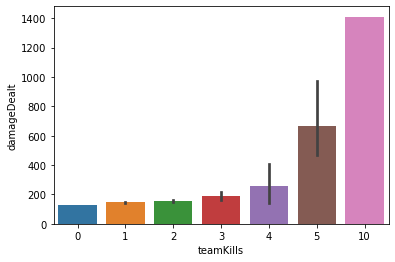

In [19]:
sns.barplot(x = data.teamKills,y = data.damageDealt)

### There is a  strong correlation between teamKills and damageDealt , as seen in above barplot 

In [25]:
data.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073770e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


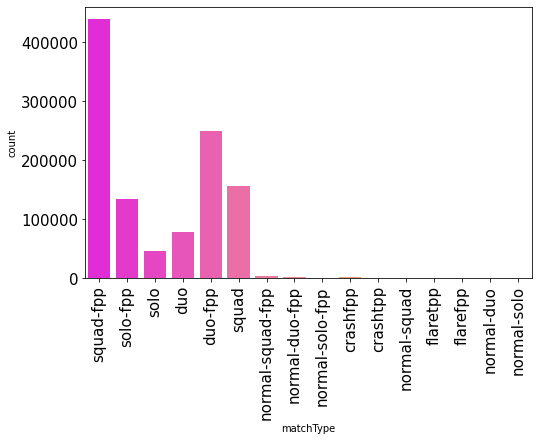

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data['matchType'], data=data, palette='spring')
plt.xticks(fontsize=15)
plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.show()


#### From above countplot we can say that most of the members wil play Squad-fpp

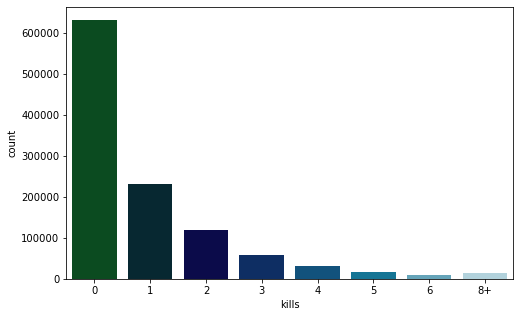

In [29]:
data1 = data.copy()
data1.loc[data1['kills'] > data1['kills'].quantile(0.98)] = '8+'
plt.figure(figsize=(8,5))
sns.countplot(data1['kills'].astype('str').sort_values(), data=data1, palette='ocean')

#### from above count plot we can say that most of the members are doing 0 kills and when kills are increasing the count of members are decreasing

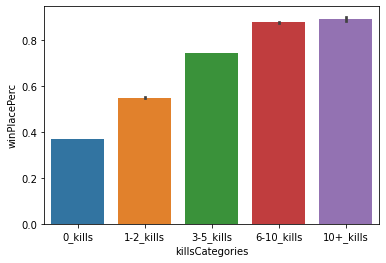

In [30]:
data2 = data.copy()
data2['killsCategories'] = pd.cut(data2['kills'], [-1, 0, 2, 5, 10, 60], 
                                  labels=['0_kills', '1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

sns.barplot(x='killsCategories', y='winPlacePerc', data=data2)

#### The chances of winning percentage is depending on kills. The higher number of kills, the higher probability of winning the game.

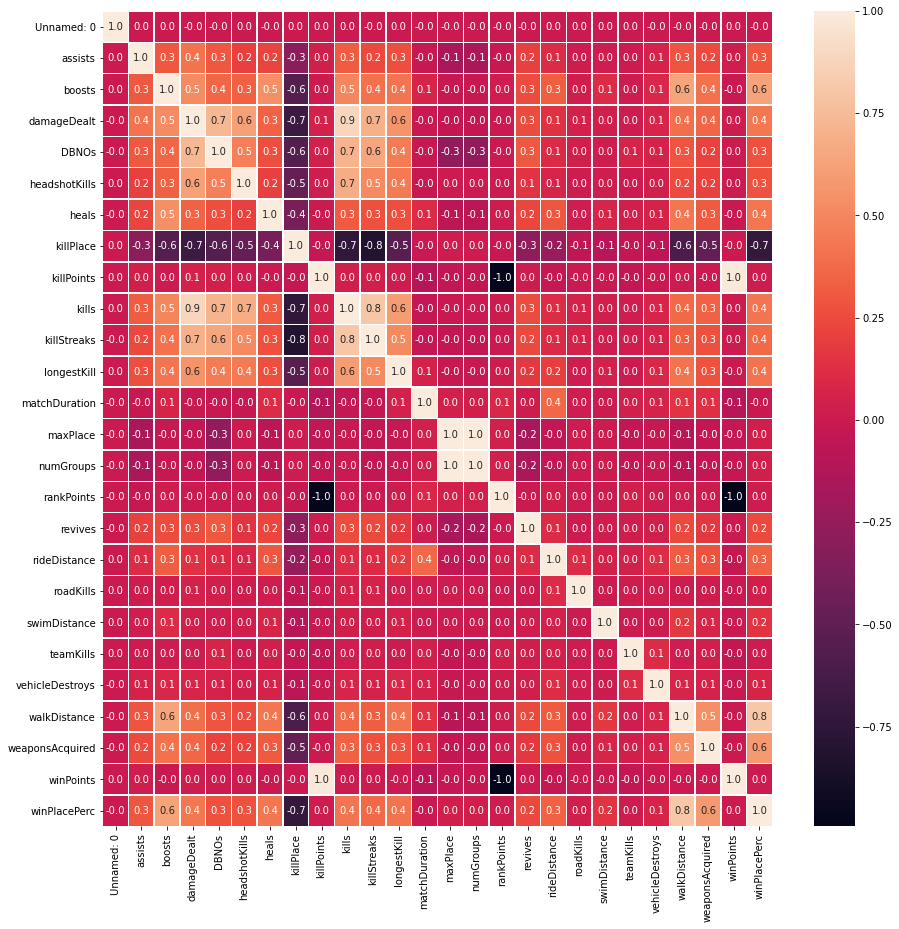

In [31]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

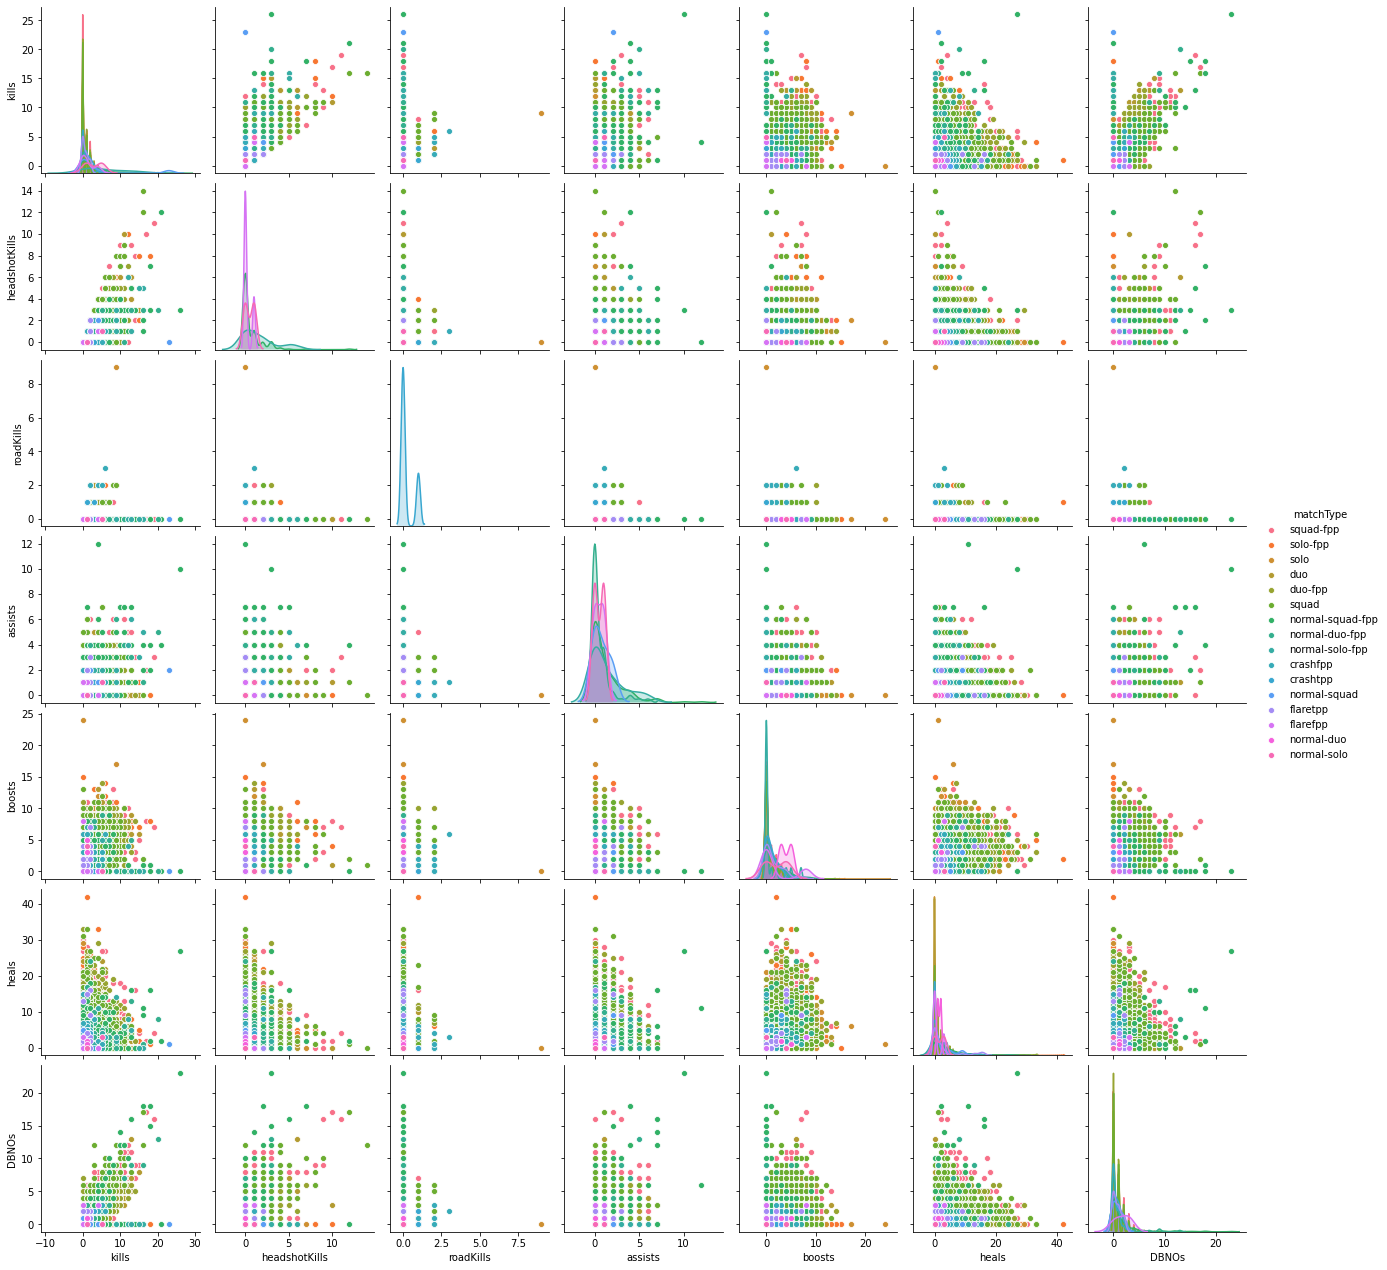

In [32]:
data1 = data[['kills', 'headshotKills', 'roadKills', 'assists', 'boosts', 'heals', 'DBNOs', 'matchType']]
sns.pairplot(data1[:50000], hue='matchType')

<h3>Research Question -</h3> 

__If any player plays in squad-fpp and kills more than 5 enemies, he has the 60% chances of winning.__

We will verify this using hypothesis testing.
so, in this case - 

**Step1 -** Alternative hypothesis - $$ H_1: > \ 0.6 $$ 
> Null hypothesis - $$ H_0: <= \ 0.6 $$ 

**Step2 -** Collect sample of size 100 and then compute mean

**Step3 -** Compute test statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

**Step4 -** Decide $ \alpha $

**Step5 -** Reject or accept based on Tailed test or P value

In [133]:
# z_score for sampling distributions

def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

In [134]:
data['matchType'].unique()

array(['squad-fpp', 'solo-fpp', 'solo', 'duo', 'duo-fpp', 'squad',
       'normal-squad-fpp', 'normal-duo-fpp', 'normal-solo-fpp',
       'crashfpp', 'crashtpp', 'normal-squad', 'flaretpp', 'flarefpp',
       'normal-duo', 'normal-solo'], dtype=object)

In [135]:
data1 = data[(data['matchType']=='squad-fpp') & (data['kills']>=5)]
data2 = data1[['winPlacePerc']]

In [136]:
data2

,winPlacePerc
41,1.0000
46,0.9643
48,0.8148
205,0.9630
251,0.5385
...,...
1111595,0.8929
1111617,0.9655
1111639,0.8077
1111690,1.0000


In [137]:
data2.shape[0]

15003

In [138]:
import random
samples = random.sample(range(0, data2.shape[0]), 100)
sample_mean = data2.iloc[samples, 0].mean()
print(sample_mean)

0.8589650000000003


In [139]:
std = data2['winPlacePerc'].std()
print(std)

0.185303769363418


In [140]:
# One Tail

confidence_level = 0.90

alpha = 1 - confidence_level

z_critical = norm.ppf(1 - alpha)

print(z_critical)

1.2815515655446004


In [141]:
# Defining the sample and population parameters

sample_size = 100
sample_mean = sample_mean
pop_mean = data2['winPlacePerc'].mean()
pop_std = std
print(pop_mean)

0.843077431180411


In [142]:
# Calculating the z-score

z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

0.8573796892620453


Text(0.8589650000000003, 0.0007, 'x_bar')

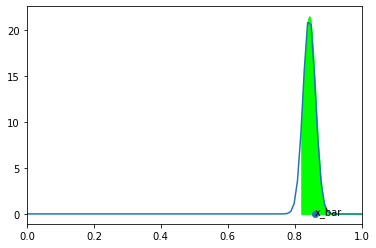

In [154]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 0
x_max = 1


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (right tailed Test)
z_critical_right = pop_mean - (z_critical * std)


# Shading the right rejection region
x2 = np.linspace(z_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='lime')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In [155]:
# Conclusion using z test

if(np.abs(z) > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [156]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(z)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.3912350804426068
Fail to reject Null Hypothesis


***Research Conclusion -*** After hypothesis testing we can see that people who are playing in squad-fpp and killing more than 5 enemies don't have the 60% chances of winning. 

### Final Conclusion

#### After EDA ON PUBG Data we concluded some findings from the data
* The data consists skewness ,we have observed that roadKills has more skew value and rankPoints  has negitive skew value
* There is a  strong correlation between teamKills and damageDealt , as seen in above barplot 
* we can say that most of the members wil play Squad-fpp
* we can say that most of the members are doing 0 kills and when kills are increasing the count of members are decreasing
* The chances of winning percentage is depending on kills. The higher number of kills, the higher probability of winning the game.
* After hypothesis testing we can see that people who are playing in squad-fpp and killing more than 5 enemies don't have the 60% chances of winning.